<div>
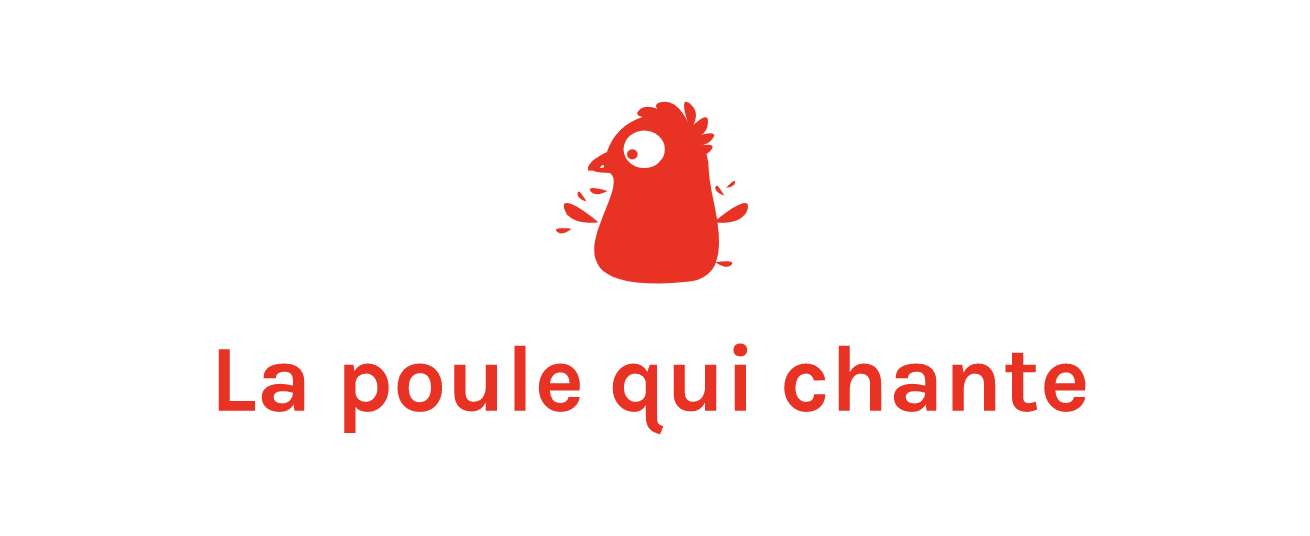
</div>

<h1><center>Projet 9: Produisez une étude de marché avec Python</center></h1>

### Sommaire

* [ACP](#chapter1)
* [Classification ascendante hiérarchique](#chapter2)
    * [Clustermap](#section_2_1)
    * [Boxplot des clusters](#section_2_2)
    * [Diagrammes de Kiviat ](#section_2_3)
* [Kmeans](#chapter3)
    * [Heatmap ](#section_3_1)
    * [Boxplot des clusters](#section_3_2)
    * [Diagrammes de Kiviat ](#section_3_3)
* [Pays à requalifier](#chapter4)
    * [KNN Imputer ](#section_4_1)
    * [ACP](#section_4_2)
    * [Kmeans](#section_4_3)
    * [Heatmap ](#section_4_4)
    * [Boxplot des clusters](#section_4_5)
    * [Diagrammes de Kiviat](#section_4_6)

In [1]:
# J'importe les librairies et les modules qui vont me servir pour ce projet.
import pandas as pd

import numpy as np

from sklearn import decomposition
from sklearn import preprocessing

from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_final = pd.read_csv('df_final.csv').dropna()

J'ai réalisé en amont une ACP qui m'a permis de détecter 3 outliers :  
* l'Inde
* Les États-Unis d'Amérique
* Le Brésil

J'ai décidé de les retirer car l'algorithme de Kmeans est sensible aux outliers.

In [3]:
df_final_ss_outliers = df_final.loc[(df_final['Zone']=='États-Unis d\'Amérique')|(df_final['Zone']=='Inde')|(df_final['Zone']=='Brésil'),:]

In [4]:
df_final.set_index('Zone', inplace = True)

In [5]:
df_final_ss= ['Inde','États-Unis d\'Amérique','Brésil']

In [6]:
df_final = df_final.drop(df_final_ss)

In [7]:
df_final.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
Zone,,,,,,,,,,
Afghanistan,1.53,0.54,57.0,-1.53,29.0,2058.4,-2.80,36296.113,5590.381,0.628952
Afrique du Sud,35.69,14.11,2118.0,63.00,514.0,12701.3,-0.28,57009.756,8692.812,14.726128
Albanie,16.36,6.26,47.0,0.00,38.0,12771.0,0.38,2884.169,1603.534,4.086025
Algérie,6.38,1.97,277.0,0.00,2.0,11737.4,-0.92,41389.189,1340.390,1.782229
Allemagne,19.47,7.96,1739.0,646.00,842.0,52952.9,0.59,82658.409,880.187,6.654367


## ACP<a class="anchor" id="chapter1"></a>

In [8]:
# préparation des données 

X= df_final
names = df_final.index
nom_variable = df_final.columns

In [9]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [10]:
X.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
Zone,,,,,,,,,,
Afghanistan,1.53,0.54,57.0,-1.53,29.0,2058.4,-2.80,36296.113,5590.381,0.628952
Afrique du Sud,35.69,14.11,2118.0,63.00,514.0,12701.3,-0.28,57009.756,8692.812,14.726128
Albanie,16.36,6.26,47.0,0.00,38.0,12771.0,0.38,2884.169,1603.534,4.086025
Algérie,6.38,1.97,277.0,0.00,2.0,11737.4,-0.92,41389.189,1340.390,1.782229
Allemagne,19.47,7.96,1739.0,646.00,842.0,52952.9,0.59,82658.409,880.187,6.654367


In [11]:
# Calcul des composantes principales

pca = decomposition.PCA(n_components=10) #correspond aux 10 variables 
pca.fit(X_scaled)

PCA(n_components=10)

In [12]:
#Variance 
print(pca.explained_variance_)
print(pca.explained_variance_ratio_.cumsum())

[3.73109124 2.25247322 1.53493338 0.81416852 0.68325841 0.49163336
 0.28395291 0.21431246 0.04885546 0.00983717]
[0.3707174  0.59452083 0.74703023 0.82792518 0.89581304 0.94466122
 0.97287449 0.99416836 0.99902259 1.        ]


In [13]:
# Je crée une df qui affiche la variance expliquée pour chaque dimension.
variance = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(10)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
variance

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,3.731091,37.0,37.0
1,Dim2,2.252473,22.0,59.0
2,Dim3,1.534933,15.0,75.0
3,Dim4,0.814169,8.0,83.0
4,Dim5,0.683258,7.0,90.0
5,Dim6,0.491633,5.0,94.0
6,Dim7,0.283953,3.0,97.0
7,Dim8,0.214312,2.0,99.0
8,Dim9,0.048855,0.0,100.0
9,Dim10,0.009837,0.0,100.0


In [14]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

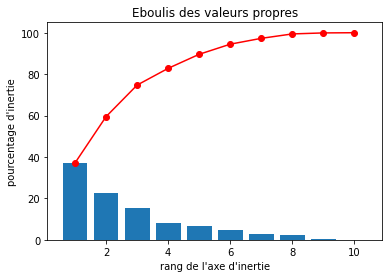

In [15]:
display_scree_plot(pca)

In [16]:
# Calcul des composantes principales
n_comp = 3
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=3)

In [17]:
# Fonction qui me permet d'afficher mes cercles de corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="orange")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

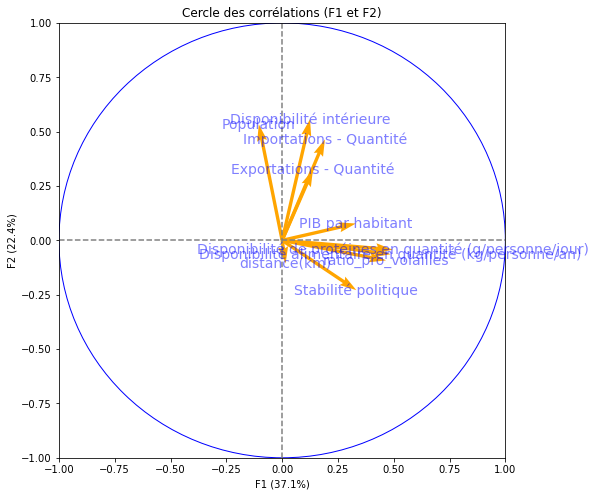

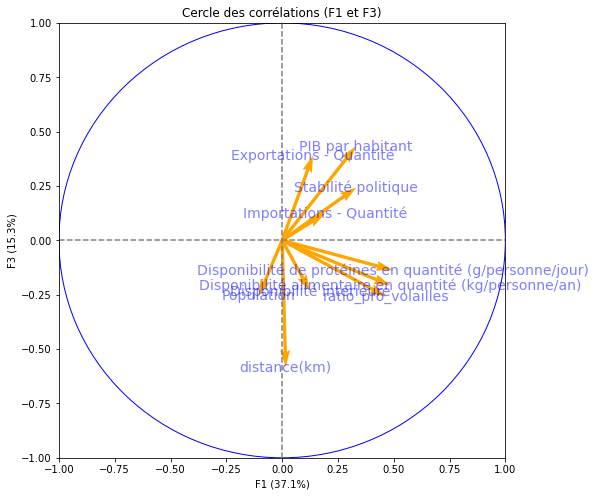

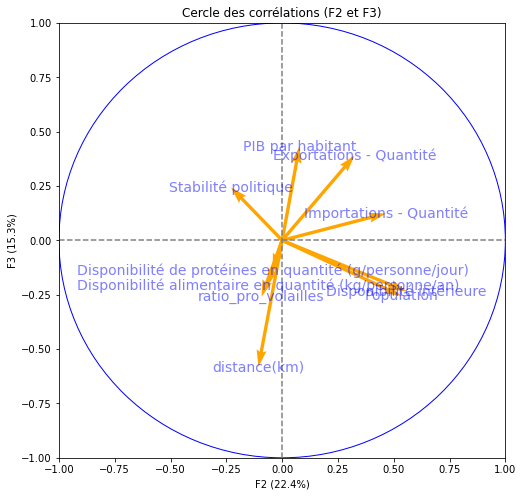

In [18]:
pcs = pca.components_
display_circles(pcs,n_comp , pca, [(0,1),(0,2),(1,2)], labels = np.array(nom_variable))

In [19]:
# Fonction qui permet de projeter les individus sur les dimensions 
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(8,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

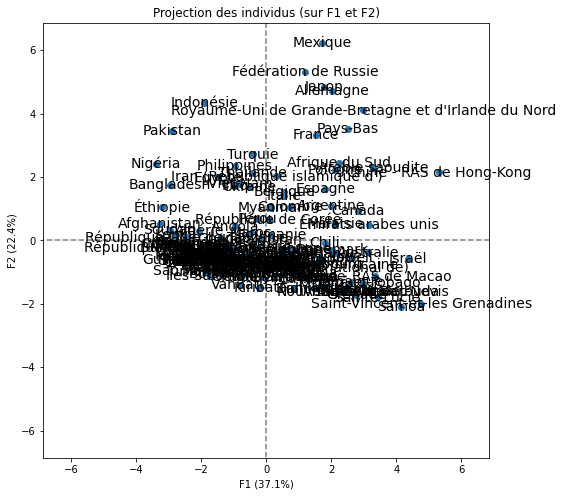

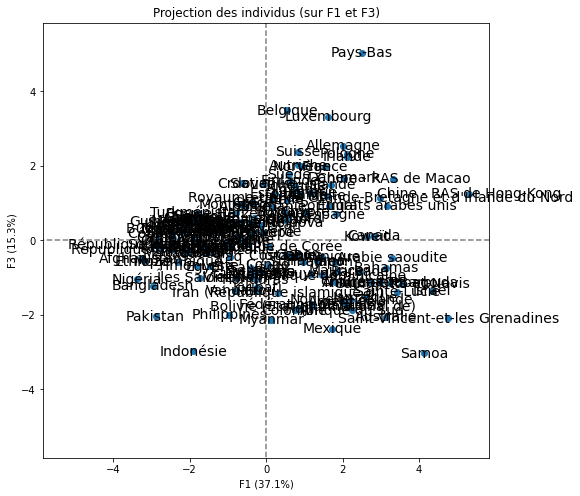

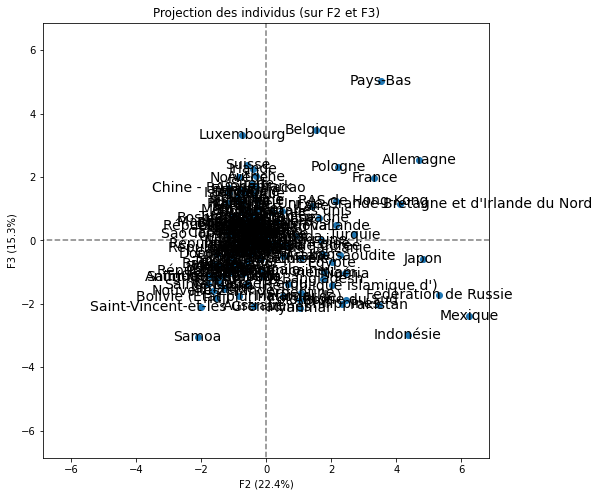

<Figure size 432x288 with 0 Axes>

In [20]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(0,2),(1,2)], labels = np.array(names))
plt.figure()
plt.show()

## Classification ascendante hiérarchique<a class="anchor" id="chapter2"></a>

In [21]:
def plot_dendrogram(Z, names):
    plt.figure(figsize=(15,10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Distance')
    plt.axhline(y =12, linewidth = .5, c = "dimgray", linestyle = "--")
    dendrogram(
        Z,
        labels = names,
        orientation = "top",
    )
    plt.show()
    

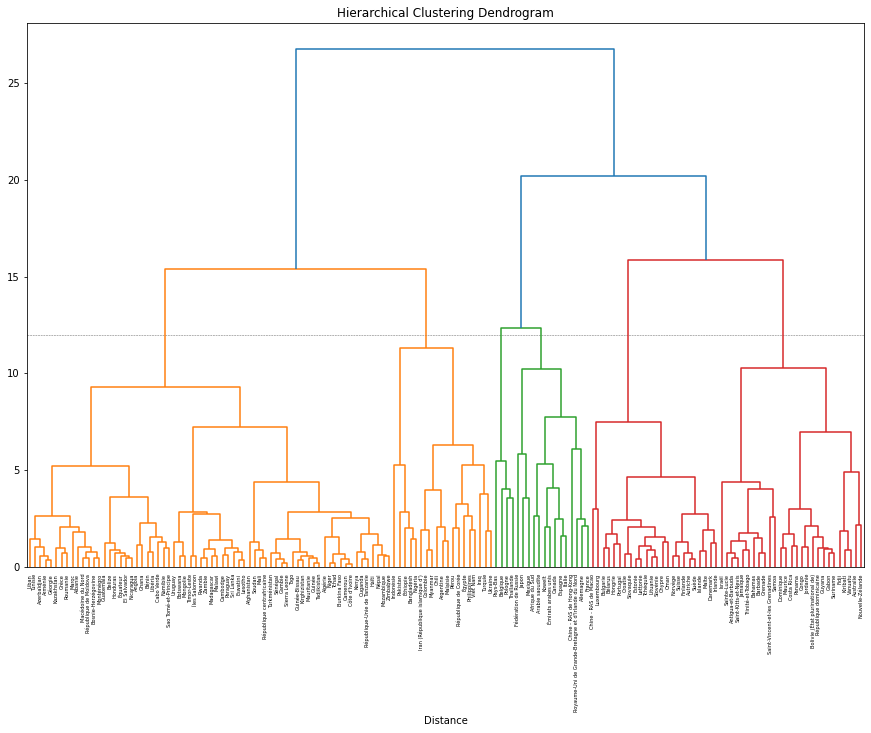

In [22]:
# préparation des données pour le clustering
X = df_final.values
names = df_final.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

In [23]:
# Découpe du dendrogramme en 6 clusters
clusters = fcluster(Z, 6, criterion='maxclust')

# Création d'un df avec une colonne cluster et une colonne zone
groupes = pd.DataFrame({"cluster": clusters, "Zone": names})
print(groupes)


     cluster                 Zone
0          1          Afghanistan
1          4       Afrique du Sud
2          1              Albanie
3          1              Algérie
4          4            Allemagne
..       ...                  ...
151        2               Égypte
152        4  Émirats arabes unis
153        1             Équateur
154        2             Éthiopie
155        1         Îles Salomon

[156 rows x 2 columns]


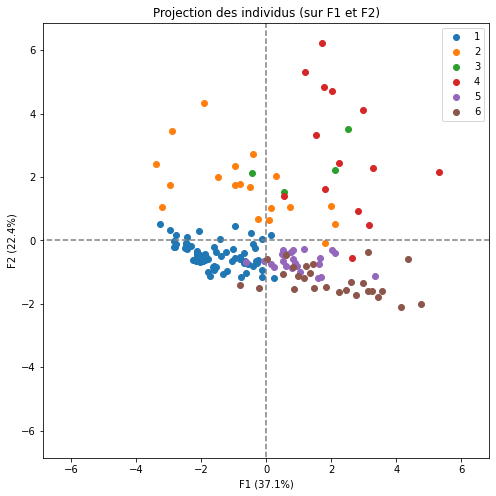

In [24]:
# Projection des individus sur F1 et F2
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels=None, illustrative_var=clusters)
plt.show()


In [25]:
# Je tri les pays par cluster
groupes.sort_values(by=['cluster']).head()

,cluster,Zone
0,1,Afghanistan
94,1,Mozambique
93,1,Monténégro
92,1,Mongolie
90,1,Mauritanie


In [26]:
# Affichage du nombre de pays par cluster
groupes['cluster'].value_counts()

1    68
6    27
5    24
2    19
4    14
3     4
Name: cluster, dtype: int64

In [27]:
# Mise à l'échelle des données
df_final_scaled = pd.DataFrame(X_scaled, columns= list(nom_variable), index=df_final.index)

In [28]:
df_final_scaled.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
Zone,,,,,,,,,,
Afghanistan,-1.194325,-1.192373,-0.486105,-0.321940,-0.319902,-0.881247,-3.102482,0.275499,-0.058274,-1.255213
Afrique du Sud,0.994959,1.263464,2.317011,0.024321,2.230278,-0.370258,-0.267938,0.783200,0.741152,1.511021
Albanie,-0.243884,-0.157193,-0.499706,-0.313730,-0.272579,-0.366911,0.474443,-0.543444,-1.085594,-0.576845
Algérie,-0.883493,-0.933578,-0.186888,-0.313730,-0.461870,-0.416537,-0.987822,0.400332,-1.153401,-1.028910
Allemagne,-0.044567,0.150465,1.801543,3.152631,3.954935,1.562311,0.710655,1.411860,-1.271984,-0.072869


In [29]:
groupes.head()

,cluster,Zone
0,1,Afghanistan
1,4,Afrique du Sud
2,1,Albanie
3,1,Algérie
4,4,Allemagne


In [30]:
# Jointure de la colonne cluster dans df_final
df_final_clusters = pd.merge(df_final_scaled, groupes, on='Zone')

In [31]:
df_final_clusters.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles,cluster
0,Afghanistan,-1.194325,-1.192373,-0.486105,-0.321940,-0.319902,-0.881247,-3.102482,0.275499,-0.058274,-1.255213,1
1,Afrique du Sud,0.994959,1.263464,2.317011,0.024321,2.230278,-0.370258,-0.267938,0.783200,0.741152,1.511021,4
2,Albanie,-0.243884,-0.157193,-0.499706,-0.313730,-0.272579,-0.366911,0.474443,-0.543444,-1.085594,-0.576845,1
3,Algérie,-0.883493,-0.933578,-0.186888,-0.313730,-0.461870,-0.416537,-0.987822,0.400332,-1.153401,-1.028910,1
4,Allemagne,-0.044567,0.150465,1.801543,3.152631,3.954935,1.562311,0.710655,1.411860,-1.271984,-0.072869,4


In [32]:
# Calcul de la moyenne des variables pour chaque cluster 
df_final_clusters_moy = df_final_clusters.groupby('cluster').agg(['mean'])

In [33]:
df_final_clusters_moy.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,
1,-0.727577,-0.744964,-0.433002,-0.299442,-0.327711,-0.617303,-0.418630,-0.274626,0.010824,-0.691686
2,-0.108689,-0.159479,1.115563,0.004939,0.015510,-0.309637,-1.026895,1.640709,0.418403,-0.132710
3,-0.071003,0.046404,0.307159,4.911299,0.846083,0.856613,0.361961,0.216794,-0.757111,-0.110933
4,0.844899,0.964208,1.891599,0.848367,2.378632,1.068030,0.302506,0.903854,-0.335390,0.676103
5,0.168396,0.310930,-0.405407,-0.084562,-0.191954,1.331336,1.060755,-0.490214,-1.003779,0.051566


## Clustermap<a class="anchor" id="section_2_1"></a>

<Figure size 432x288 with 0 Axes>

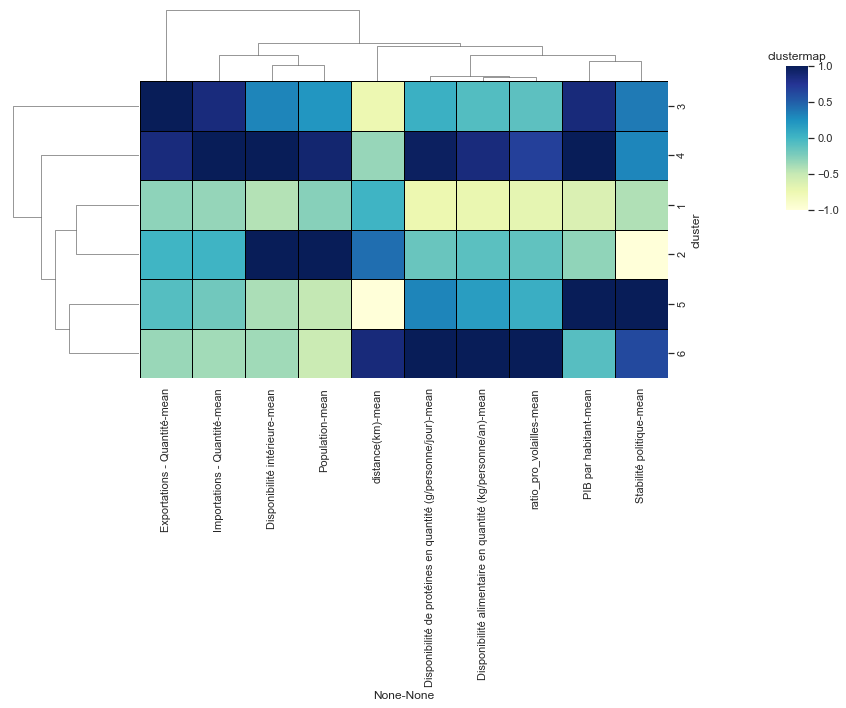

In [34]:
# Création d'une clustermap
plt.figure()
sns.set(rc={'figure.figsize':(13,10)})
sns.clustermap(df_final_clusters_moy,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=-1, vmax=1,cbar_pos=(1.1, 0.7, .03, .2))
plt.title('clustermap')

plt.show()


## Boxplot des clusters <a class="anchor" id="section_2_2"></a>

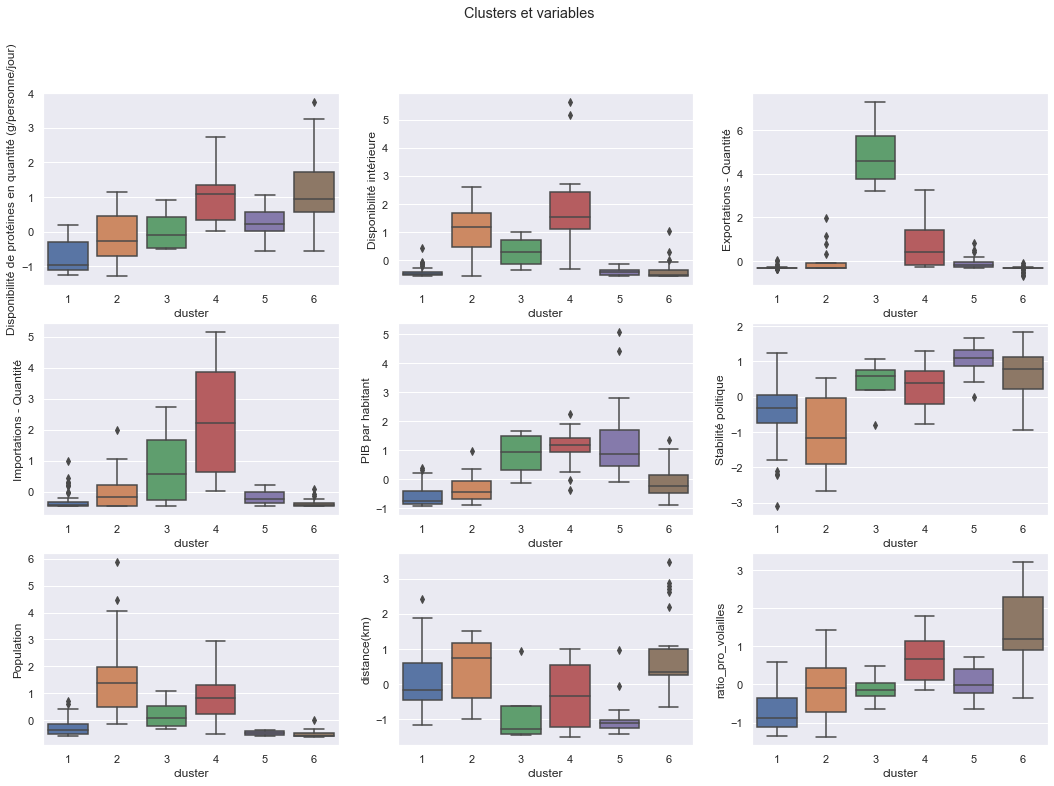

In [35]:
# Création de boxplot 
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

fig.suptitle('Clusters et variables')

sns.boxplot(ax=axes[0, 0], data=df_final_clusters, x='cluster', y='Disponibilité de protéines en quantité (g/personne/jour)')
sns.boxplot(ax=axes[0, 1], data=df_final_clusters, x='cluster', y='Disponibilité intérieure')
sns.boxplot(ax=axes[0, 2], data=df_final_clusters, x='cluster', y='Exportations - Quantité')
sns.boxplot(ax=axes[1, 0], data=df_final_clusters, x='cluster', y='Importations - Quantité')
sns.boxplot(ax=axes[1, 1], data=df_final_clusters, x='cluster', y='PIB par habitant')
sns.boxplot(ax=axes[1, 2], data=df_final_clusters, x='cluster', y='Stabilité politique')
sns.boxplot(ax=axes[2, 0], data=df_final_clusters, x='cluster', y='Population')
sns.boxplot(ax=axes[2, 1], data=df_final_clusters, x='cluster', y='distance(km)')
sns.boxplot(ax=axes[2, 2], data=df_final_clusters, x='cluster', y='ratio_pro_volailles')

plt.show()

## Diagrammes de Kiviat<a class="anchor" id="section_2_3"></a>

In [36]:
den_1 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_clusters_moy.iloc[0].values});
den_2 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_clusters_moy.iloc[1].values});
den_3 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_clusters_moy.iloc[2].values});
den_4 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_clusters_moy.iloc[3].values});
den_5 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_clusters_moy.iloc[4].values});
den_6 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_clusters_moy.iloc[5].values});

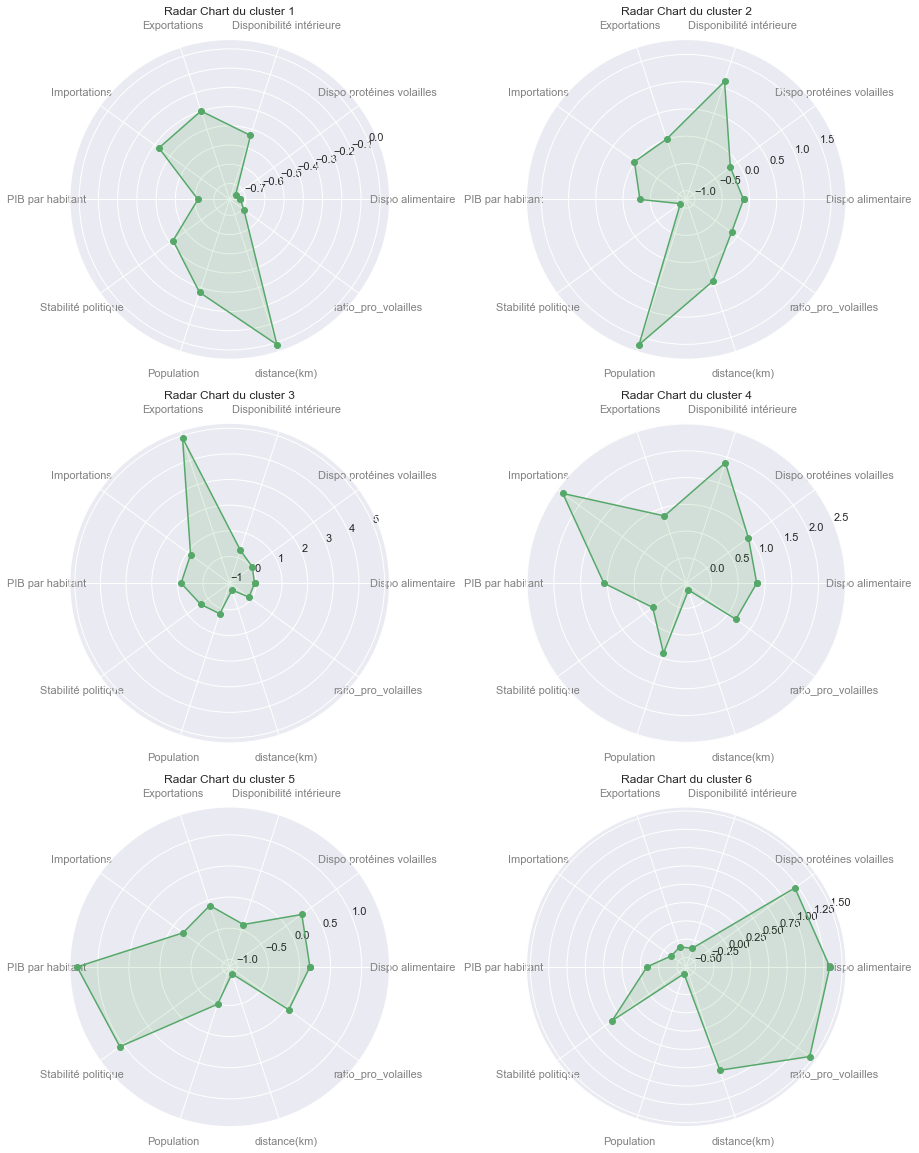

In [37]:
fig = plt.figure(figsize=(15, 20))
fig.tight_layout()
ax = fig.add_subplot(321, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(den_1) + 1) / float(len(den_1)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = den_1['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], den_1['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 1")

ax = fig.add_subplot(322, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(den_2) + 1) / float(len(den_2)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = den_2['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], den_2['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 2")

ax = fig.add_subplot(323, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(den_3) + 1) / float(len(den_3)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = den_3['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], den_3['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 3")

ax = fig.add_subplot(324, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(den_4) + 1) / float(len(den_4)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = den_4['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], den_4['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 4")

ax = fig.add_subplot(325, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(den_5) + 1) / float(len(den_5)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = den_5['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], den_5['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 5")

ax = fig.add_subplot(326, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(den_6) + 1) / float(len(den_6)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = den_6['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], den_6['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 6")


plt.show()

Le cluster 4 regroupe les pays qui importent le plus de viande de volailles.

In [38]:
# Aperçu des pays du cluster 4 
cluster_4 = df_final_clusters.loc[df_final_clusters['cluster']==4]

In [39]:
cluster_4

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles,cluster
1,Afrique du Sud,0.994959,1.263464,2.317011,0.024321,2.230278,-0.370258,-0.267938,0.783200,0.741152,1.511021,4
4,Allemagne,-0.044567,0.150465,1.801543,3.152631,3.954935,1.562311,0.710655,1.411860,-1.271984,-0.072869,4
7,Arabie saoudite,1.486522,1.527688,1.388079,-0.260071,3.323963,1.291200,-0.605383,0.197189,-0.289123,1.798458,4
28,Canada,1.208375,1.218220,1.385359,0.560909,0.484588,1.339736,1.284313,0.286185,-0.042084,0.983287,4
30,Chine - RAS de Hong-Kong,2.137026,2.738414,-0.182808,3.243851,4.296712,1.893418,0.980612,-0.435055,0.985085,1.409182,4
41,Espagne,0.655286,0.966664,1.472404,0.823838,0.605524,0.917795,0.361961,0.529214,-1.227028,0.565382,4
46,France,0.175259,0.329631,1.575770,2.374578,2.188213,1.160170,0.361961,0.975184,-1.485905,-0.062402,4
47,Fédération de Russie,0.693099,0.599284,5.632876,0.303347,0.715945,0.264709,-0.672873,2.952875,-0.856060,0.310606,4
67,Italie,-0.082379,0.126938,1.031740,0.668227,0.037649,1.016326,0.395706,0.873005,-1.212792,-0.154539,4
69,Japon,-0.106733,0.020163,2.720954,-0.260071,5.148525,0.986822,1.295561,2.511016,1.007285,0.066349,4


## Kmeans<a class="anchor" id="chapter3"></a>

In [40]:
# Je reprend mes données réduites et je les renomme
Y = X_scaled


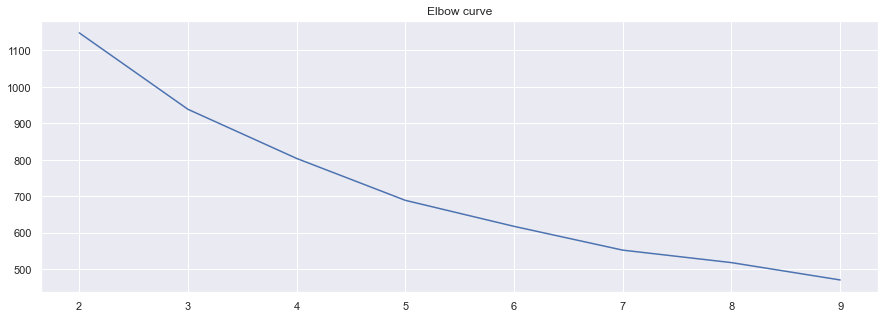

In [41]:
# Création de la courbe en coude
silhouette = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k) # création d'un objet de clustering
    kmeans.fit(Y) # clustering sur les données normalisées
    silhouette.append(kmeans.inertia_) # calcul du coefficient de silhouette

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), silhouette)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [42]:
#Création d'une PCA pour projeter les données et observer les clusters avec le module decomposition
pca = decomposition.PCA(n_components=10).fit(Y)
Y_projected = pca.transform(Y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


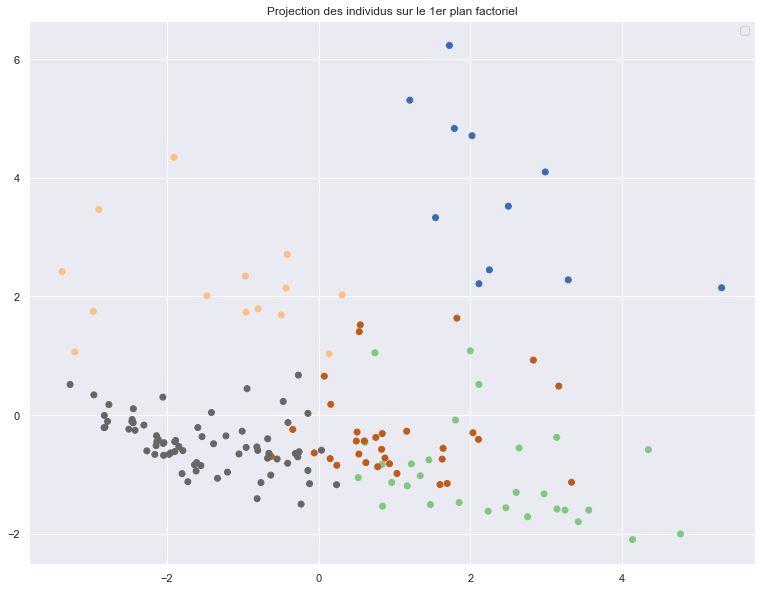

In [43]:
# Clustering par K-means
km = KMeans(n_clusters=5, random_state=3)
km.fit(Y)
# Récupération des clusters attribués à chaque individu
clusters = km.labels_
# Affichage du clustering par projection des individus sur le premier plan factoriel
plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=km.labels_,cmap='Accent')
plt.title("Projection des individus sur le 1er plan factoriel")
plt.legend()
plt.show()

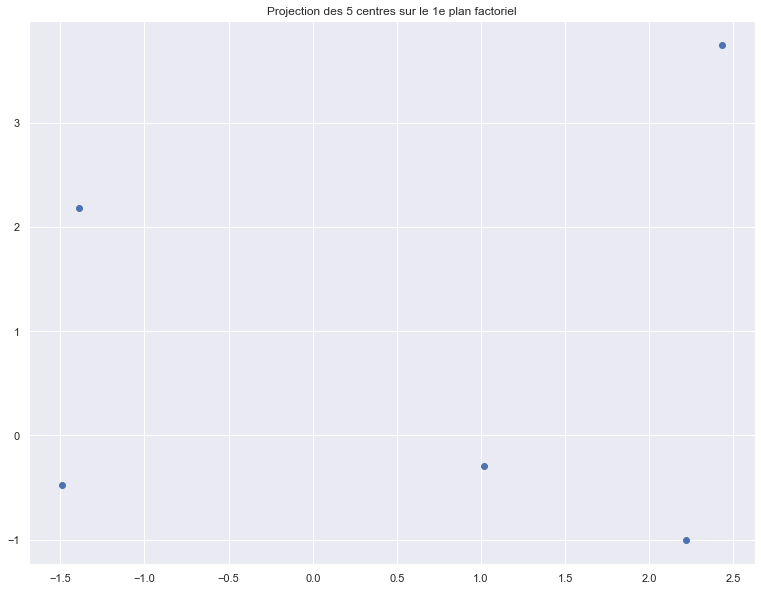

In [44]:
# Affichage des positions des centres de classes
plt.figure()
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

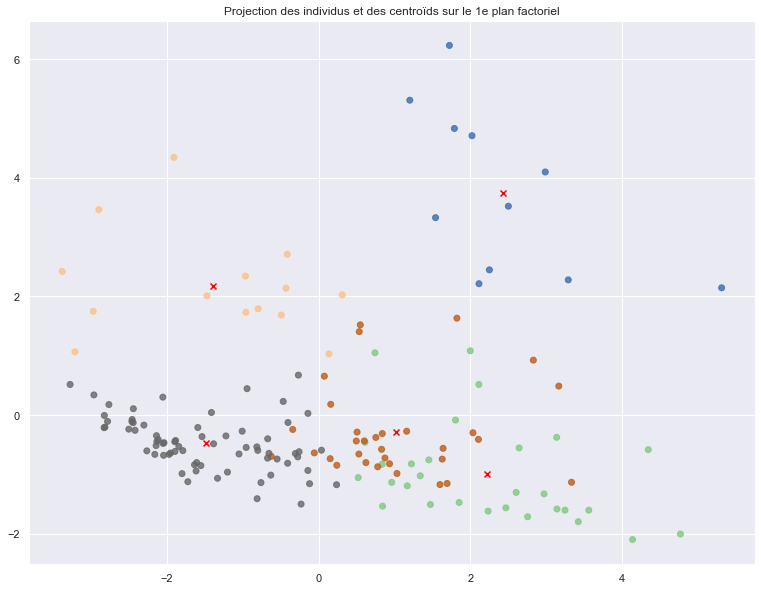

In [45]:
# Création d'un graphique avec la projection des individus et des centres des clusters
plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=clusters.astype(float),cmap='Accent', alpha=.8)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1], c='red', marker='x')
plt.title("Projection des individus et des centroïds sur le 1e plan factoriel".format(len(centroids)))
plt.show()

In [46]:
#mise à l'échelle des données
df_final_k_scaled = pd.DataFrame(X_scaled, columns= list(nom_variable), index=df_final.index)

In [47]:
df_final_k_scaled.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
Zone,,,,,,,,,,
Afghanistan,-1.194325,-1.192373,-0.486105,-0.321940,-0.319902,-0.881247,-3.102482,0.275499,-0.058274,-1.255213
Afrique du Sud,0.994959,1.263464,2.317011,0.024321,2.230278,-0.370258,-0.267938,0.783200,0.741152,1.511021
Albanie,-0.243884,-0.157193,-0.499706,-0.313730,-0.272579,-0.366911,0.474443,-0.543444,-1.085594,-0.576845
Algérie,-0.883493,-0.933578,-0.186888,-0.313730,-0.461870,-0.416537,-0.987822,0.400332,-1.153401,-1.028910
Allemagne,-0.044567,0.150465,1.801543,3.152631,3.954935,1.562311,0.710655,1.411860,-1.271984,-0.072869


In [48]:
# Regroupement des clusters par pays
clusters = km.labels_
df_clusters = pd.DataFrame(index=[df_final.index])
df_clusters['Clusters'] = clusters
df_clusters = df_clusters.reset_index()
df_clusters.head()

,Zone,Clusters
0,Afghanistan,4
1,Afrique du Sud,2
2,Albanie,4
3,Algérie,4
4,Allemagne,2


In [49]:
# Jointure de mes fichiers
df_final_k = pd.merge(df_final_k_scaled,df_clusters, on='Zone')

In [50]:
df_final_k = df_final_k.sort_values('Clusters')

In [51]:
df_final_k.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles,Clusters
106,Panama,0.875112,0.581186,-0.302495,-0.313730,-0.367225,0.481743,0.485691,-0.513477,0.735558,0.843998,0
29,Chili,1.037898,0.919610,0.350342,0.303347,0.342619,0.194817,0.519436,-0.161417,1.506602,0.893667,0
33,Colombie,0.757829,0.441835,1.670975,-0.302998,-0.062255,-0.299680,-0.819099,0.584667,0.744982,0.906722,0
119,République dominicaine,0.967400,0.678913,-0.053601,-0.281534,-0.251546,-0.176572,0.226983,-0.356455,0.350953,1.463274,0
35,Costa Rica,0.407262,0.145036,-0.381379,-0.297632,-0.382999,-0.003171,0.733151,-0.492810,0.799551,0.232093,0


In [52]:
df_final_k_moy = df_final_k.groupby('Clusters').agg(['mean'])

In [53]:
df_final_k_moy

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Clusters,,,,,,,,,,
0,1.470853,1.320065,-0.094403,-0.265968,-0.319358,0.062747,0.538829,-0.414757,0.778917,1.517450
1,-0.450525,-0.483466,0.996961,0.280109,0.000467,-0.498674,-1.470691,2.173326,0.152019,-0.459554
2,0.685641,0.851662,2.168516,2.037015,2.969280,0.918148,0.288337,1.089186,-0.385558,0.591147
3,0.195347,0.326011,-0.186548,0.094916,0.003636,1.269310,0.914528,-0.332556,-0.915874,0.055773
4,-0.716294,-0.733057,-0.415770,-0.309327,-0.336051,-0.650797,-0.392471,-0.281970,0.126175,-0.655138


## Heatmap<a class="anchor" id="section_3_1"></a>

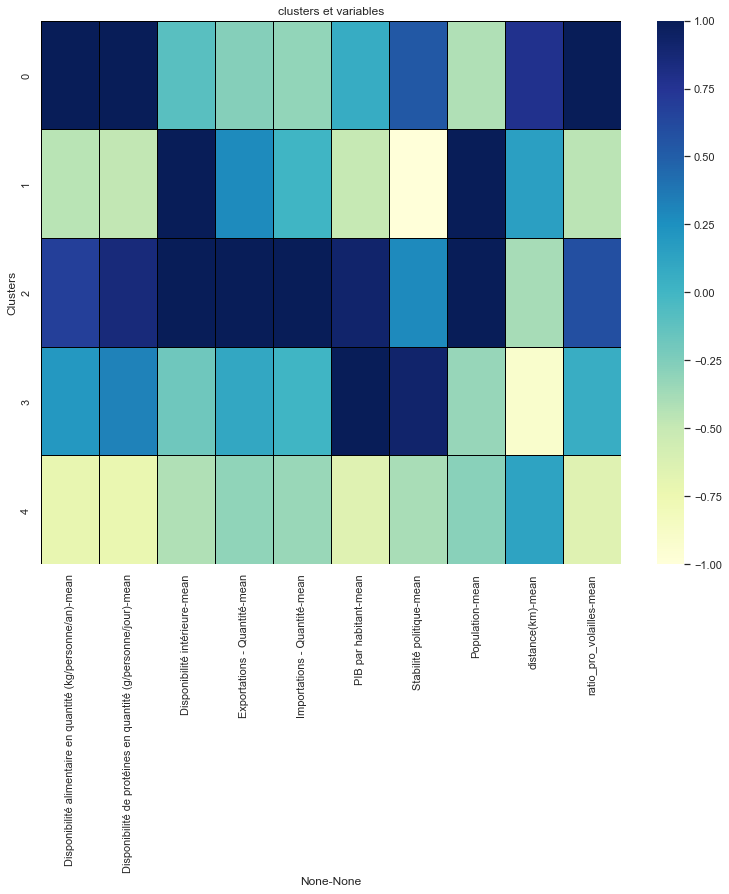

In [54]:
plt.figure()
sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(df_final_k_moy,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=-1, vmax=1 )
plt.title('clusters et variables')
plt.show()

## Boxplot des clusters<a class="anchor" id="section_3_2"></a>

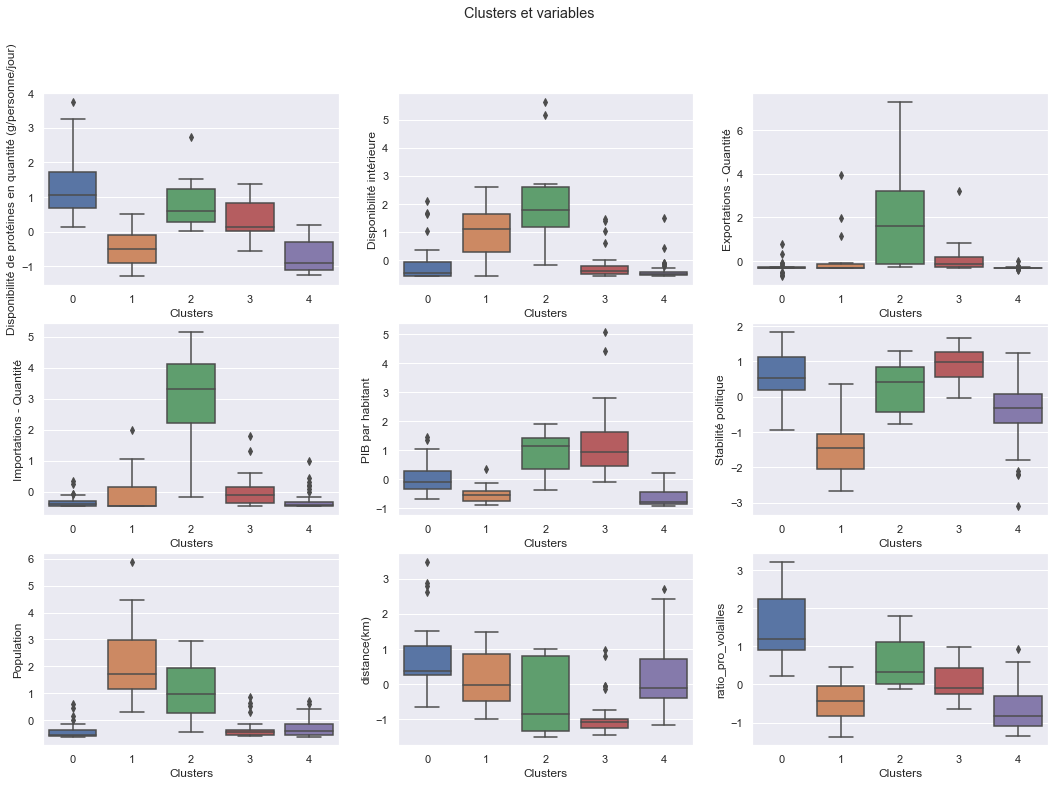

In [55]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

fig.suptitle('Clusters et variables')

sns.boxplot(ax=axes[0, 0], data=df_final_k, x='Clusters', y='Disponibilité de protéines en quantité (g/personne/jour)')
sns.boxplot(ax=axes[0, 1], data=df_final_k, x='Clusters', y='Disponibilité intérieure')
sns.boxplot(ax=axes[0, 2], data=df_final_k, x='Clusters', y='Exportations - Quantité')
sns.boxplot(ax=axes[1, 0], data=df_final_k, x='Clusters', y='Importations - Quantité')
sns.boxplot(ax=axes[1, 1], data=df_final_k, x='Clusters', y='PIB par habitant')
sns.boxplot(ax=axes[1, 2], data=df_final_k, x='Clusters', y='Stabilité politique')
sns.boxplot(ax=axes[2, 0], data=df_final_k, x='Clusters', y='Population')
sns.boxplot(ax=axes[2, 1], data=df_final_k, x='Clusters', y='distance(km)')
sns.boxplot(ax=axes[2, 2], data=df_final_k, x='Clusters', y='ratio_pro_volailles')

plt.show()

## Diagramme de Kiviat<a class="anchor" id="section_3_3"></a>

In [56]:
df_final_k_moy

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Clusters,,,,,,,,,,
0,1.470853,1.320065,-0.094403,-0.265968,-0.319358,0.062747,0.538829,-0.414757,0.778917,1.517450
1,-0.450525,-0.483466,0.996961,0.280109,0.000467,-0.498674,-1.470691,2.173326,0.152019,-0.459554
2,0.685641,0.851662,2.168516,2.037015,2.969280,0.918148,0.288337,1.089186,-0.385558,0.591147
3,0.195347,0.326011,-0.186548,0.094916,0.003636,1.269310,0.914528,-0.332556,-0.915874,0.055773
4,-0.716294,-0.733057,-0.415770,-0.309327,-0.336051,-0.650797,-0.392471,-0.281970,0.126175,-0.655138


In [57]:
dk1 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_k_moy.iloc[0].values});
dk2 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_k_moy.iloc[1].values});
dk3 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_k_moy.iloc[2].values});
dk4 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_k_moy.iloc[3].values});
dk5 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_k_moy.iloc[4].values});


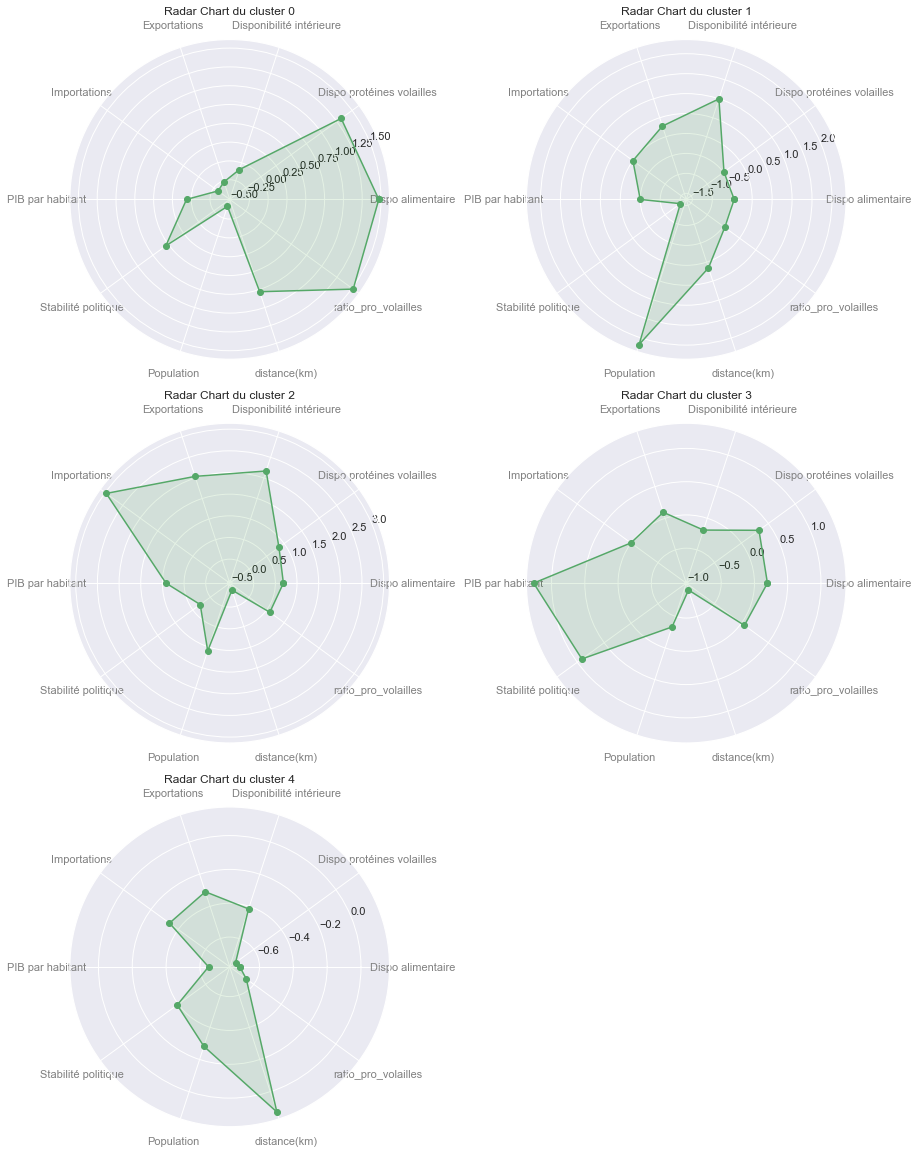

In [58]:
fig = plt.figure(figsize=(15, 20))

ax = fig.add_subplot(321, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(dk1) + 1) / float(len(dk1)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = dk1['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], dk1['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 0")

ax = fig.add_subplot(322, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(dk2) + 1) / float(len(dk2)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = dk2['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], dk2['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 1")

ax = fig.add_subplot(323, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(dk3) + 1) / float(len(dk3)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = dk3['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], dk3['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 2")

ax = fig.add_subplot(324, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(dk4) + 1) / float(len(dk4)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = dk4['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], dk4['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 3")

ax = fig.add_subplot(325, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(dk5) + 1) / float(len(dk5)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = dk5['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], dk5['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 4")

plt.show()

le cluster 2 semble être le candidat idéal.

In [59]:
cluster_2 = df_final_k.loc[df_final_k['Clusters']==2]

In [60]:
cluster_2.sort_values('Zone')

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles,Clusters
1,Afrique du Sud,0.994959,1.263464,2.317011,0.024321,2.230278,-0.370258,-0.267938,0.783200,0.741152,1.511021,2
4,Allemagne,-0.044567,0.150465,1.801543,3.152631,3.954935,1.562311,0.710655,1.411860,-1.271984,-0.072869,2
7,Arabie saoudite,1.486522,1.527688,1.388079,-0.260071,3.323963,1.291200,-0.605383,0.197189,-0.289123,1.798458,2
30,Chine - RAS de Hong-Kong,2.137026,2.738414,-0.182808,3.243851,4.296712,1.893418,0.980612,-0.435055,0.985085,1.409182,2
46,France,0.175259,0.329631,1.575770,2.374578,2.188213,1.160170,0.361961,0.975184,-1.485905,-0.062402,2
47,Fédération de Russie,0.693099,0.599284,5.632876,0.303347,0.715945,0.264709,-0.672873,2.952875,-0.856060,0.310606,2
69,Japon,-0.106733,0.020163,2.720954,-0.260071,5.148525,0.986822,1.295561,2.511016,1.007285,0.066349,2
91,Mexique,0.791796,0.385733,5.174531,-0.265437,4.638489,-0.033212,-0.762858,2.444215,0.873598,0.335204,2
108,Pays-Bas,0.010550,0.244572,-0.057681,7.295093,2.724540,1.664851,1.081845,-0.196935,-1.388524,-0.119837,2
110,Pologne,0.649518,0.906942,1.008618,5.186301,-0.183191,0.463388,0.631918,0.316114,-1.146240,0.494375,2


In [61]:
cluster_2["Zone"]

91                                               Mexique
114    Royaume-Uni de Grande-Bretagne et d'Irlande du...
69                                                 Japon
1                                         Afrique du Sud
7                                        Arabie saoudite
46                                                France
47                                  Fédération de Russie
108                                             Pays-Bas
30                              Chine - RAS de Hong-Kong
110                                              Pologne
4                                              Allemagne
Name: Zone, dtype: object

## Pays à requalifier<a class="anchor" id="chapter4"></a>

In [62]:
pays = pd.read_csv('index_with_nan.csv')

In [63]:
df_final = df_final.reset_index()

In [64]:
pays.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
0,"Chine, Taiwan Province de",33.17,11.01,785.0,8.00,161.0,NaN,0.86,23674.546,9834.232,11.175709
1,"Chine, continentale",12.33,3.96,18161.0,576.00,452.0,NaN,NaN,1421021.791,8225.232,3.474369
2,Cuba,23.72,7.12,342.0,-25.72,312.0,NaN,0.65,11339.254,7729.485,6.685068
3,Djibouti,2.68,0.92,3.0,NaN,3.0,4885.2,-0.74,944.099,5595.459,1.163330
4,Maldives,13.50,4.70,12.0,NaN,12.0,18058.6,0.23,496.402,8294.178,4.894034


On remarque que la Chine continentale comprend une population très importante ce qui pourrait être considéré comme un outlier.  
Je décide de la retirer de ma dataframe.

In [65]:
#Je retire la Chine continentale du fichier
pays.drop(1,0,inplace=True)

C:\Users\sarah\AppData\Local\Temp/ipykernel_11584/2264382898.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  pays.drop(1,0,inplace=True)


In [66]:
# Je regroupe mes 2 dataframes
pays_df_final = pd.concat([pays, df_final], axis=0)

In [67]:
pays_df_final.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
0,"Chine, Taiwan Province de",33.17,11.01,785.0,8.00,161.0,NaN,0.86,23674.546,9834.232,11.175709
2,Cuba,23.72,7.12,342.0,-25.72,312.0,NaN,0.65,11339.254,7729.485,6.685068
3,Djibouti,2.68,0.92,3.0,NaN,3.0,4885.2,-0.74,944.099,5595.459,1.163330
4,Maldives,13.50,4.70,12.0,NaN,12.0,18058.6,0.23,496.402,8294.178,4.894034
5,Nouvelle-Calédonie,38.71,14.05,11.0,-40.71,9.0,NaN,NaN,277.150,16757.740,14.705847


## KNN<a class="anchor" id="section_4_1"></a>

Pour requalifier mes pays j'ai décidé d'utiliser KNN Imputer.

In [68]:
# Création de la dataframe avant imputation
avant_imput = pd.DataFrame(pays_df_final[['Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'PIB par habitant', 'Stabilité politique',
       'Population', 'distance(km)', 'ratio_pro_volailles']])

# Création d'un objet pour KNNImputer (algorithme qui analyse toutes les données et impute les valeurs en fonction de la corrélation entre elle)
imputer = KNNImputer(n_neighbors=3)
apres_imput = imputer.fit_transform(avant_imput)


In [69]:
pays_imput = pd.DataFrame(apres_imput,index=pays_df_final.Zone, columns=avant_imput.columns)

In [70]:
pays_imput.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
Zone,,,,,,,,,,
"Chine, Taiwan Province de",33.17,11.01,785.0,8.000000,161.0,5911.233333,0.86,23674.546,9834.232,11.175709
Cuba,23.72,7.12,342.0,-25.720000,312.0,7230.533333,0.65,11339.254,7729.485,6.685068
Djibouti,2.68,0.92,3.0,-4.750000,3.0,4885.200000,-0.74,944.099,5595.459,1.163330
Maldives,13.50,4.70,12.0,-13.566667,12.0,18058.600000,0.23,496.402,8294.178,4.894034
Nouvelle-Calédonie,38.71,14.05,11.0,-40.710000,9.0,4346.333333,0.89,277.150,16757.740,14.705847


## ACP<a class="anchor" id="section_4_2"></a>

In [71]:
# Je refais une nouvelle ACP
X1 = pays_imput
names1 = pays_imput.index
nom_variable1 = avant_imput.columns

In [72]:
# Centrage et reduction
std_scale1 = preprocessing.StandardScaler().fit(X1)
X_scaled1 = std_scale.transform(X1)

C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [73]:
# Calcul des composantes principales

pca1 = decomposition.PCA(n_components=10) #correspond aux 10 variables 
pca1.fit(X_scaled1)

PCA(n_components=10)

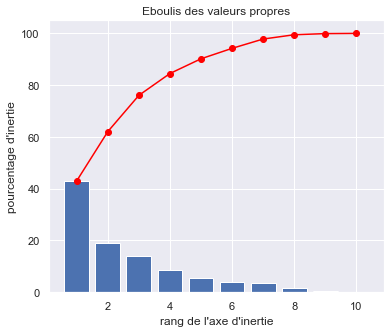

In [74]:
display_scree_plot(pca1)

In [75]:
n_comp1 = 3

In [76]:
# Calcul des composantes principales
pca1 = decomposition.PCA(n_components=n_comp1)
pca1.fit(X_scaled1)

PCA(n_components=3)

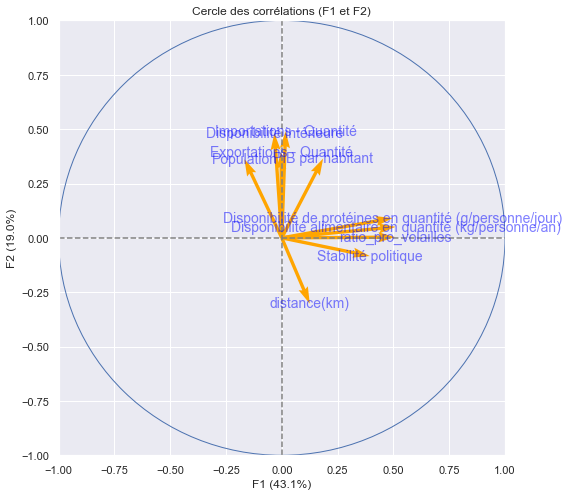

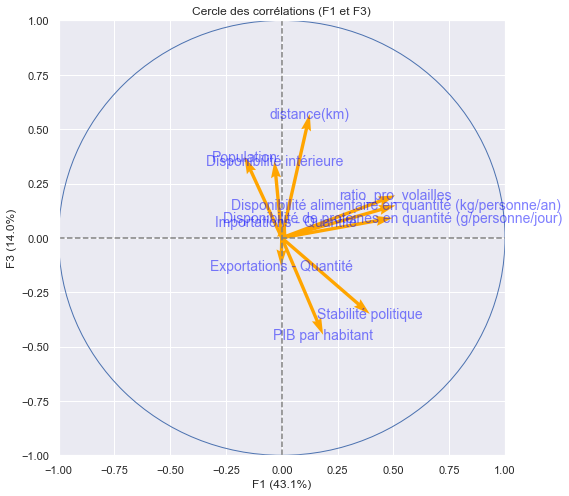

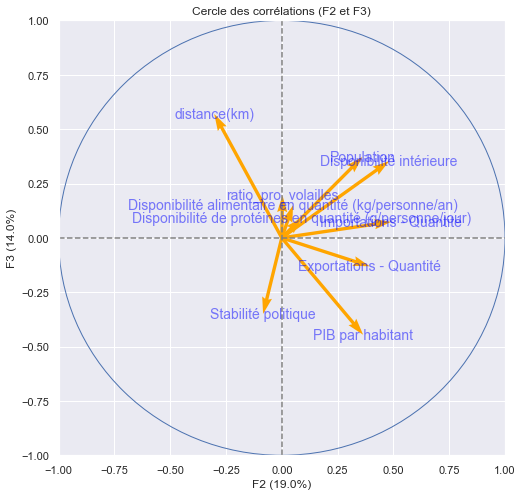

In [77]:
pcs1 = pca1.components_
display_circles(pcs1,n_comp1 , pca1, [(0,1),(0,2),(1,2)], labels = np.array(nom_variable1))

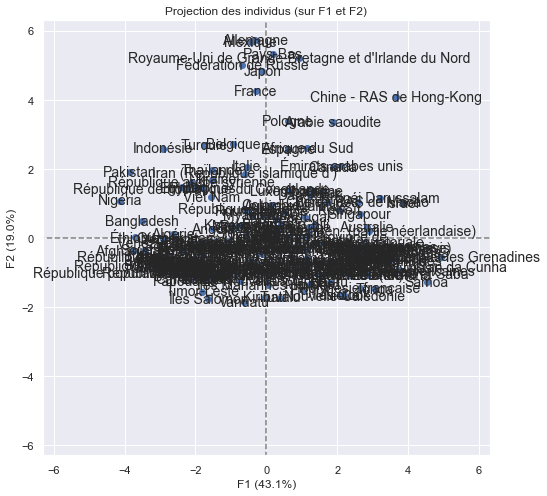

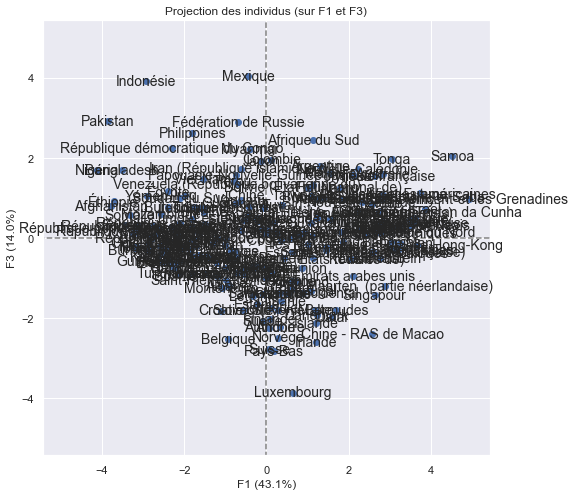

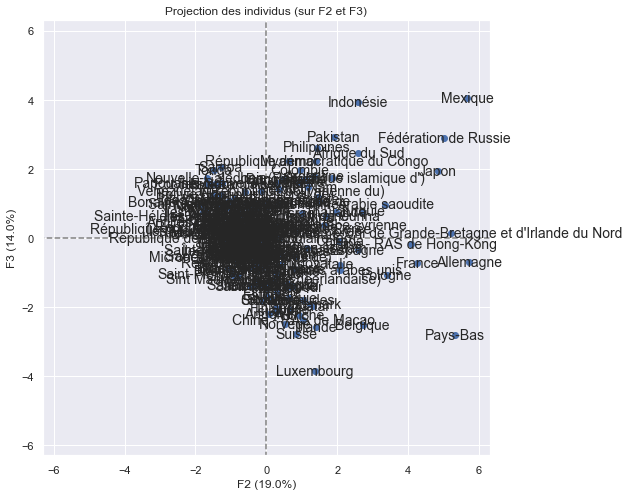

<Figure size 432x360 with 0 Axes>

In [78]:
# Projection des individus
X_projected1 = pca1.transform(X_scaled1)
display_factorial_planes(X_projected1, n_comp1, pca1, [(0,1),(0,2),(1,2)], labels = np.array(names1))
plt.figure()
plt.show()

In [79]:
# Je reprend mes données réduites et je les renomme
Y1 = X_scaled1

Text(0.5, 1.0, 'Elbow curve')

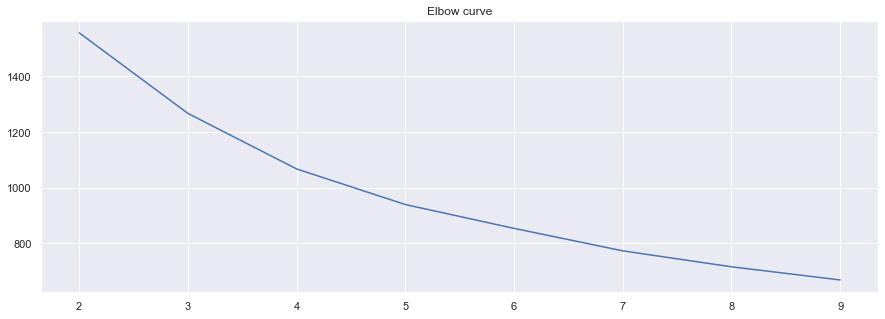

In [80]:
silhouette = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k) # création d'un objet de clustering
    kmeans.fit(Y1) # clustering sur les données normalisées
    silhouette.append(kmeans.inertia_) # calcul du coefficient de silhouette

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), silhouette)
plt.grid(True)
plt.title('Elbow curve')

In [81]:
#Création d'une PCA pour projeter les données et observer les clusters avec le module decomposition
pca1 = decomposition.PCA(n_components=10).fit(Y1)
Y_projected1 = pca1.transform(Y1)

## Kmeans<a class="anchor" id="section_4_3"></a>

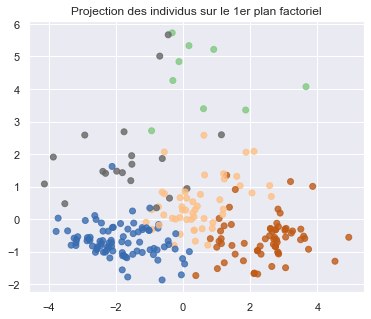

In [82]:
# Clustering par K-means
km = KMeans(n_clusters=5, random_state=3)
km.fit(Y1)
# Récupération des clusters attribués à chaque individu
clusters1 = km.labels_
# Affichage du clustering par projection des individus sur le premier plan factoriel
plt.scatter(Y_projected1[:, 0], Y_projected1[:, 1], c=clusters1.astype(float),cmap='Accent', alpha=.8)
plt.title("Projection des individus sur le 1er plan factoriel")
plt.show()

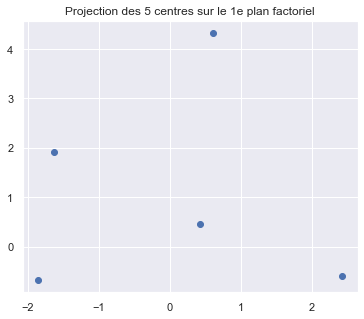

In [83]:
# Affichage des positions des centres de classes
plt.figure()
centroids1 = km.cluster_centers_
centroids_projected1 = pca1.transform(centroids1)
plt.scatter(centroids_projected1[:,0],centroids_projected1[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids1)))
plt.show()

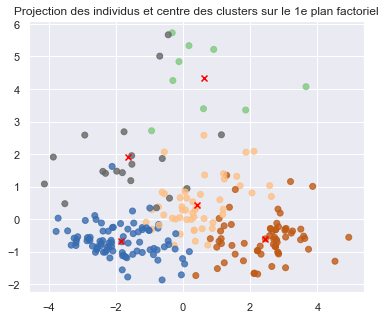

In [84]:
# Création d'un graphique avec la projection des individus et des centres des clusters
plt.scatter(Y_projected1[:, 0], Y_projected1[:, 1], c=clusters1.astype(float),cmap='Accent', alpha=.8)
plt.scatter(centroids_projected1[:,0],centroids_projected1[:,1], c='red', marker='x')
plt.title("Projection des individus et centre des clusters sur le 1e plan factoriel".format(len(centroids1)))
plt.show()

In [85]:
#mise à l'échelle des données

df_final_k_scaled1 = pd.DataFrame(X_scaled1, columns= list(nom_variable1), index=pays_imput.index)

In [86]:
df_final_k_scaled1.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
Zone,,,,,,,,,,
"Chine, Taiwan Province de",0.833454,0.702440,0.504030,-0.270803,0.374168,-0.696264,1.014356,-0.033862,1.035270,0.814336
Cuba,0.227812,-0.001555,-0.098483,-0.451740,1.168141,-0.632922,0.778144,-0.336206,0.492924,-0.066845
Djibouti,-1.120622,-1.123602,-0.559549,-0.339218,-0.456612,-0.745526,-0.785355,-0.590996,-0.056966,-1.150354
Maldives,-0.427178,-0.439515,-0.547308,-0.386527,-0.409289,-0.113042,0.305720,-0.601969,0.638433,-0.418293
Nouvelle-Calédonie,1.188508,1.252605,-0.548669,-0.532175,-0.425064,-0.771398,1.048101,-0.607343,2.819300,1.507042


In [87]:
# Regroupement des clusters par pays
clusters1 = km.labels_
df_clusters1 = pd.DataFrame(index=[pays_imput.index])
df_clusters1['Clusters'] = clusters1
df_clusters1 = df_clusters1.reset_index()
df_clusters1.head()

,Zone,Clusters
0,"Chine, Taiwan Province de",3
1,Cuba,1
2,Djibouti,2
3,Maldives,2
4,Nouvelle-Calédonie,3


In [88]:
# Jointure de mes fichiers
df_final_k1 = pd.merge(df_final_k_scaled1,df_clusters1, on='Zone')

In [89]:
df_final_k1 = df_final_k1.sort_values('Clusters')

In [90]:
df_final_k1.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles,Clusters
106,Chine - RAS de Hong-Kong,2.137026,2.738414,-0.182808,3.243851,4.296712,1.893418,0.980612,-0.435055,0.985085,1.409182,0
190,Royaume-Uni de Grande-Bretagne et d'Irlande du...,0.754624,1.201932,2.474780,1.612622,3.623675,1.216229,0.418202,1.021385,-1.410419,0.832527,0
145,Japon,-0.106733,0.020163,2.720954,-0.260071,5.148525,0.986822,1.295561,2.511016,1.007285,0.066349,0
92,Belgique,-0.481654,-0.463042,-0.356898,3.206290,1.304852,1.441771,0.530684,-0.334233,-1.431178,-0.644239,0
186,Pologne,0.649518,0.906942,1.008618,5.186301,-0.183191,0.463388,0.631918,0.316114,-1.146240,0.494375,0


In [91]:
df_final_k_moy1 = df_final_k1.groupby('Clusters').agg(['mean'])

In [92]:
df_final_k_moy1

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Clusters,,,,,,,,,,
0,0.508950,0.739640,1.152484,2.839025,2.931358,1.297796,0.600673,0.607392,-0.714556,0.411283
1,0.285513,0.393173,-0.274849,-0.124925,-0.066482,0.996711,0.851221,-0.410531,-0.683657,0.156426
2,-0.725804,-0.749818,-0.432461,-0.281468,-0.325690,-0.655082,-0.559344,-0.269462,0.196616,-0.664067
3,1.601595,1.463302,-0.378632,-0.312944,-0.371384,-0.137912,0.946028,-0.541282,0.869569,1.663085
4,-0.125206,-0.160845,1.703235,0.181673,0.425273,-0.412930,-1.269027,1.933437,0.251051,-0.111937


## Heatmap<a class="anchor" id="section_4_4"></a>

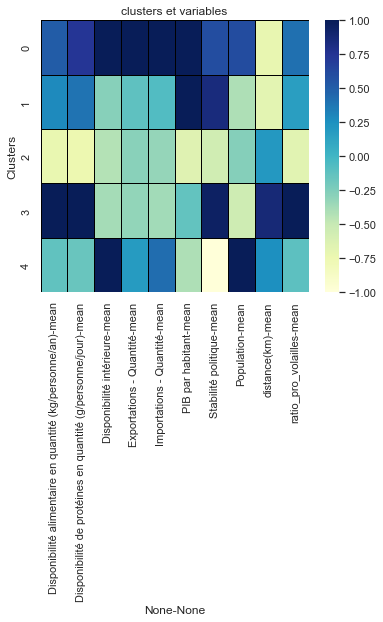

In [93]:
plt.figure()
sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(df_final_k_moy1,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=-1, vmax=1 )
plt.title('clusters et variables')
plt.show()

## Boxplot des clusters <a class="anchor" id="section_4_5"></a>

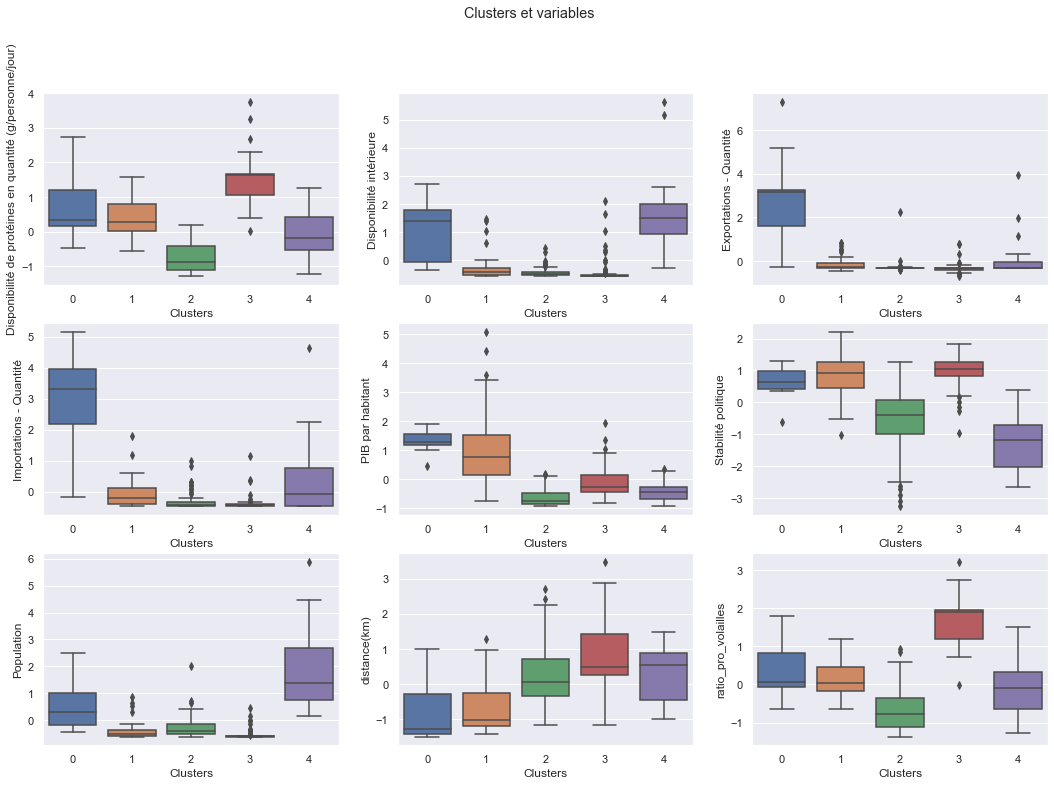

In [94]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

fig.suptitle('Clusters et variables')

sns.boxplot(ax=axes[0, 0], data=df_final_k1, x='Clusters', y='Disponibilité de protéines en quantité (g/personne/jour)')
sns.boxplot(ax=axes[0, 1], data=df_final_k1, x='Clusters', y='Disponibilité intérieure')
sns.boxplot(ax=axes[0, 2], data=df_final_k1, x='Clusters', y='Exportations - Quantité')
sns.boxplot(ax=axes[1, 0], data=df_final_k1, x='Clusters', y='Importations - Quantité')
sns.boxplot(ax=axes[1, 1], data=df_final_k1, x='Clusters', y='PIB par habitant')
sns.boxplot(ax=axes[1, 2], data=df_final_k1, x='Clusters', y='Stabilité politique')
sns.boxplot(ax=axes[2, 0], data=df_final_k1, x='Clusters', y='Population')
sns.boxplot(ax=axes[2, 1], data=df_final_k1, x='Clusters', y='distance(km)')
sns.boxplot(ax=axes[2, 2], data=df_final_k1, x='Clusters', y='ratio_pro_volailles')

plt.show()

## Diagrammes de Kiviat <a class="anchor" id="section_4_6"></a>

In [95]:
p1 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_k_moy1.iloc[0].values});
p2 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_k_moy1.iloc[1].values});
p3 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_k_moy1.iloc[2].values});
p4 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_k_moy1.iloc[3].values});
p5 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_k_moy1.iloc[4].values});


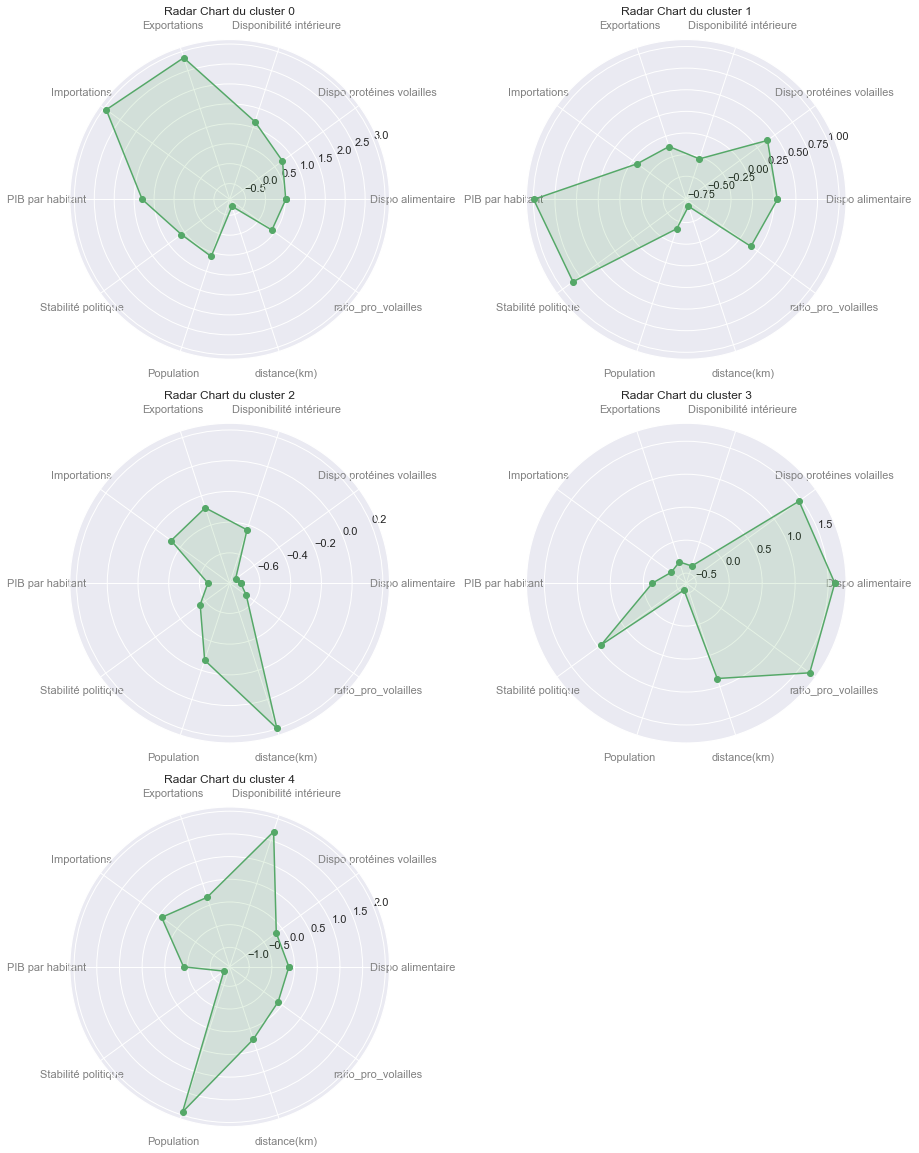

In [96]:
fig = plt.figure(figsize=(15, 20))

ax = fig.add_subplot(321, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(p1) + 1) / float(len(p1)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = p1['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], p1['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 0")

ax = fig.add_subplot(322, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(p2) + 1) / float(len(p2)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = p2['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], p2['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 1")

ax = fig.add_subplot(323, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(p3) + 1) / float(len(p3)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = p3['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], p3['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 2")

ax = fig.add_subplot(324, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(p4) + 1) / float(len(p4)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = p4['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], p4['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 3")

ax = fig.add_subplot(325, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(p5) + 1) / float(len(p5)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = p5['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], p5['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 4")

plt.show()

Le cluster 0 semble être le candidat idéal.

In [97]:
cluster_0_ = df_final_k1.loc[df_final_k1['Clusters']==0]

In [98]:
cluster_0_

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles,Clusters
106,Chine - RAS de Hong-Kong,2.137026,2.738414,-0.182808,3.243851,4.296712,1.893418,0.980612,-0.435055,0.985085,1.409182,0
190,Royaume-Uni de Grande-Bretagne et d'Irlande du...,0.754624,1.201932,2.474780,1.612622,3.623675,1.216229,0.418202,1.021385,-1.410419,0.832527,0
145,Japon,-0.106733,0.020163,2.720954,-0.260071,5.148525,0.986822,1.295561,2.511016,1.007285,0.066349,0
92,Belgique,-0.481654,-0.463042,-0.356898,3.206290,1.304852,1.441771,0.530684,-0.334233,-1.431178,-0.644239,0
186,Pologne,0.649518,0.906942,1.008618,5.186301,-0.183191,0.463388,0.631918,0.316114,-1.146240,0.494375,0
184,Pays-Bas,0.010550,0.244572,-0.057681,7.295093,2.724540,1.664851,1.081845,-0.196935,-1.388524,-0.119837,0
122,France,0.175259,0.329631,1.575770,2.374578,2.188213,1.160170,0.361961,0.975184,-1.485905,-0.062402,0
83,Arabie saoudite,1.486522,1.527688,1.388079,-0.260071,3.323963,1.291200,-0.605383,0.197189,-0.289123,1.798458,0
80,Allemagne,-0.044567,0.150465,1.801543,3.152631,3.954935,1.562311,0.710655,1.411860,-1.271984,-0.072869,0


La belgique apparait dans ce nouveau clustering.

In [99]:
cluster_0_.Zone

106                             Chine - RAS de Hong-Kong
190    Royaume-Uni de Grande-Bretagne et d'Irlande du...
145                                                Japon
92                                              Belgique
186                                              Pologne
184                                             Pays-Bas
122                                               France
83                                       Arabie saoudite
80                                             Allemagne
Name: Zone, dtype: object